### This project aims to use Python to analyse hotel booking data.
#### Dataset: https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/yuemun/Desktop/Python/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#check for missing value(s)
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#replace missing values
nan_replacements = {'children':0.0, 'country':'unknown', 'agent':0.0, 'company':0.0}
full_df = df.fillna(nan_replacements) #replace null with the respective values

#drop rows with zero guests-->zero adult, children and baby
zero_guests = list(full_df.loc[full_df["adults"]
                   + full_df["children"]
                   + full_df["babies"]==0].index)
full_df.drop(full_df.index[zero_guests], inplace=True)

In [6]:
#inspect data
full_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Exploratory data analysis

In [8]:
#categorise data into Resort Hotel and City Hotel
rh = full_df[(full_df.hotel=='Resort Hotel')&(full_df.is_canceled==0)]
ch = full_df[(full_df.hotel=='City Hotel')&(full_df.is_canceled==0)]

#### 1. Demographic of customers

In [10]:
#get number of guests for each country
country_data = pd.DataFrame(full_df[full_df["is_canceled"] == 0]["country"].value_counts()) #会出现country和count
#rename column
country_data.rename(columns={'country':'Number of Guests'}, inplace=True)
country_data

,Number of Guests
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
...,...
BHR,1
DJI,1
MLI,1
NPL,1


In [11]:
#total guests
total_guests = country_data['Number of Guests'].sum()
#new columns
country_data['Percentage_of_guests'] = round(country_data['Number of Guests']/total_guests*100, 2)
country_list = list(country_data.index)
guests_list = list(country_data['Number of Guests'])

In [12]:
country_data

,Number of Guests,Percentage_of_guests
PRT,20977,27.97
GBR,9668,12.89
FRA,8468,11.29
ESP,6383,8.51
DEU,6067,8.09
...,...,...
BHR,1,0.00
DJI,1,0.00
MLI,1,0.00
NPL,1,0.00


#### Data visualisation - Pie Chart

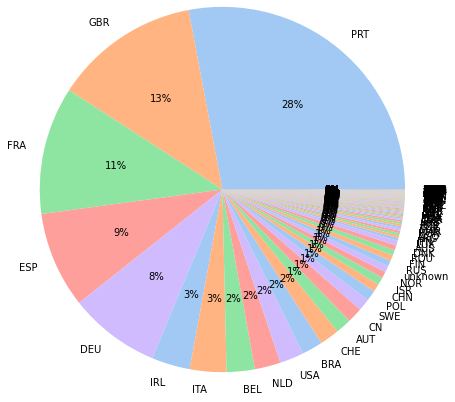

In [14]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(guests_list, labels = country_list, colors = colors, autopct='%.0f%%', radius=2.1)
plt.show()

In [15]:
#A large part of its customers came from Portugal and Europe.

#### 2. Average Daily Rate Per Person

In [17]:
#create a new column for Average Daily Rate Per Person
full_df['adr_pp'] = full_df['adr']/(full_df['adults']+full_df['children'])
full_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [18]:
#only include actual guests
full_df_act_guests = full_df[full_df['is_canceled']==0]
#new data frame with actual guests
room_rate = full_df_act_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_rate.head()

,hotel,reserved_room_type,adr_pp
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40


#### Data visualisation - Boxplot

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr_pp'>

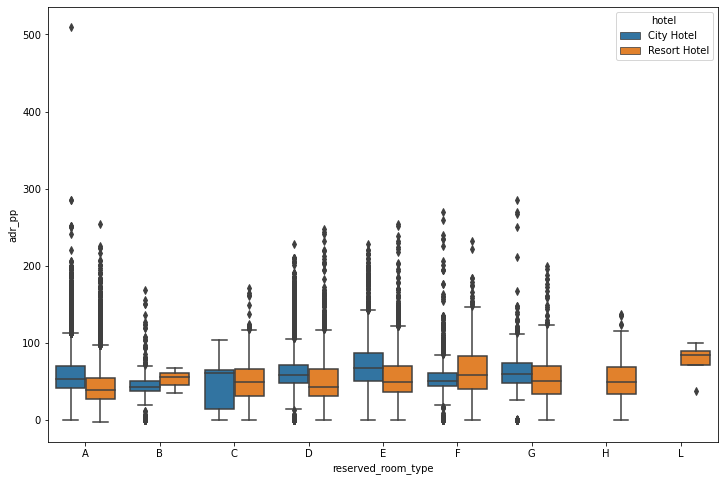

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = room_rate, x='reserved_room_type', y='adr_pp', hue='hotel')

#### 3. Room rates

In [24]:
room_rates_monthly = full_df_act_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
room_rates_monthly

,hotel,arrival_date_month,adr_pp
48869,City Hotel,April,81.90
110755,City Hotel,April,115.00
110756,City Hotel,April,57.50
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25
...,...,...,...
43535,City Hotel,September,47.25
43534,City Hotel,September,0.00
43533,City Hotel,September,31.00
43577,City Hotel,September,45.00


In [25]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_rates_monthly["arrival_date_month"] = pd.Categorical(room_rates_monthly["arrival_date_month"], categories=ordered_months, ordered=True)
room_rates_monthly.head()

,hotel,arrival_date_month,adr_pp
48869,City Hotel,April,81.90
110755,City Hotel,April,115.00
110756,City Hotel,April,57.50
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25


#### Data Visualisation - Lineplot

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr_pp'>

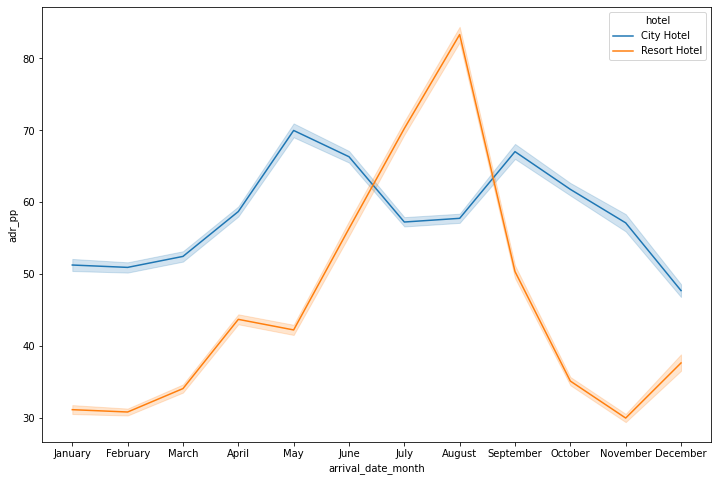

In [26]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_rates_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"])

In [27]:
#Resort Hotel's room rates peaked in summer season.
#City Hotel's room rate peaked in spring and autumn seasons.

#### 4. Monthly Performance

In [28]:
#get the monthly number of guests of both hotel
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guest_monthly = ch.groupby("arrival_date_month")["hotel"].count()

In [29]:
#create a dataframe 
resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort Hotel", 
                    "guests": list(resort_guests_monthly.values)})
city_guest_data = pd.DataFrame({"month": list(city_guest_monthly.index),
             "hotel" :"City Hotel",
             "guests" : list(city_guest_monthly.values)})

In [30]:
#combine both data
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)
full_guest_data

,month,hotel,guests
0,April,Resort Hotel,2550
1,August,Resort Hotel,3257
2,December,Resort Hotel,2014
3,February,Resort Hotel,2308
4,January,Resort Hotel,1866
5,July,Resort Hotel,3137
6,June,Resort Hotel,2037
7,March,Resort Hotel,2571
8,May,Resort Hotel,2535
9,November,Resort Hotel,1975


In [31]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)
full_guest_data

,month,hotel,guests
0,April,Resort Hotel,2550
1,August,Resort Hotel,3257
2,December,Resort Hotel,2014
3,February,Resort Hotel,2308
4,January,Resort Hotel,1866
5,July,Resort Hotel,3137
6,June,Resort Hotel,2037
7,March,Resort Hotel,2571
8,May,Resort Hotel,2535
9,November,Resort Hotel,1975


#### Data Visualisation - Lineplot

<AxesSubplot:xlabel='month', ylabel='guests'>

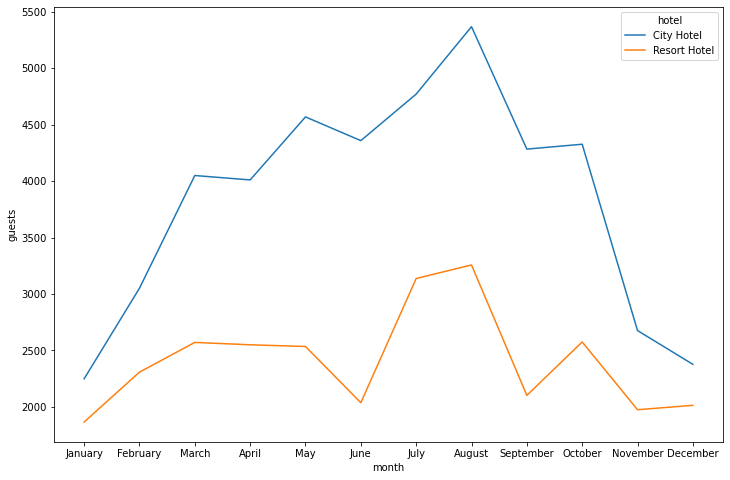

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
            hue_order = ["City Hotel", "Resort Hotel"])

In [33]:
#This suggests that Resort Hotel experiences their peak season during the warm summer months.
#The number of guests was greater in the spring and autumn season and peaked in the summer.

#### 6. Number of nights the guest stayed or booked to stay at the hotel

In [35]:
#create a new column to calculate total nights stayed
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
rh["total_nights"].value_counts()
rh_num_nights_stayed = list(rh["total_nights"].value_counts().index)
rh_count_guests_stayed = list(rh["total_nights"].value_counts())#取count

ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]
ch_num_nights_stayed = list(ch['total_nights'].value_counts().index)
ch_count_guests_stayed = list(ch['total_nights'].value_counts())


/var/folders/wx/1t7r70td2c98x42h3cl0zcxr0000gn/T/ipykernel_39086/1794013546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
/var/folders/wx/1t7r70td2c98x42h3cl0zcxr0000gn/T/ipykernel_39086/1794013546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]


In [38]:
#create dataframe
rh_num_nights_df = pd.DataFrame({'hotel':'Resort Hotel',
             'num_nights_stayed':rh_num_nights_stayed,
             'count_guests_stayed':rh_count_guests_stayed})
ch_num_nights_df = pd.DataFrame({'hotel':'City Hotel',
             'num_nights_stayed':ch_num_nights_stayed,
             'count_guests_stayed':ch_count_guests_stayed})

In [39]:
rh_num_nights_df

,hotel,num_nights_stayed,count_guests_stayed
0,Resort Hotel,1,6579
1,Resort Hotel,2,4488
2,Resort Hotel,7,4434
3,Resort Hotel,3,3828
4,Resort Hotel,4,3321
5,Resort Hotel,5,1899
6,Resort Hotel,6,1205
7,Resort Hotel,10,699
8,Resort Hotel,14,630
9,Resort Hotel,8,509


In [40]:
ch_num_nights_df

,hotel,num_nights_stayed,count_guests_stayed
0,City Hotel,3,11889
1,City Hotel,2,10983
2,City Hotel,1,9155
3,City Hotel,4,7694
4,City Hotel,5,3210
5,City Hotel,7,1245
6,City Hotel,6,1111
7,City Hotel,0,251
8,City Hotel,8,205
9,City Hotel,9,119


#### Data Visualation - Barplot (Resort Hotel)

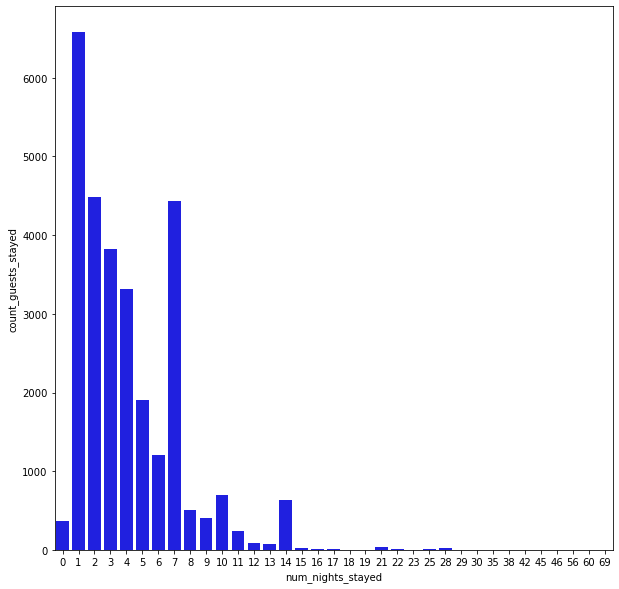

In [42]:
plt.figure(figsize=(10, 10))
sns.barplot(x = "num_nights_stayed", y = "count_guests_stayed",data=rh_num_nights_df, color='blue')
plt.show()

#### Data Visualation - Barplot (City Hotel)

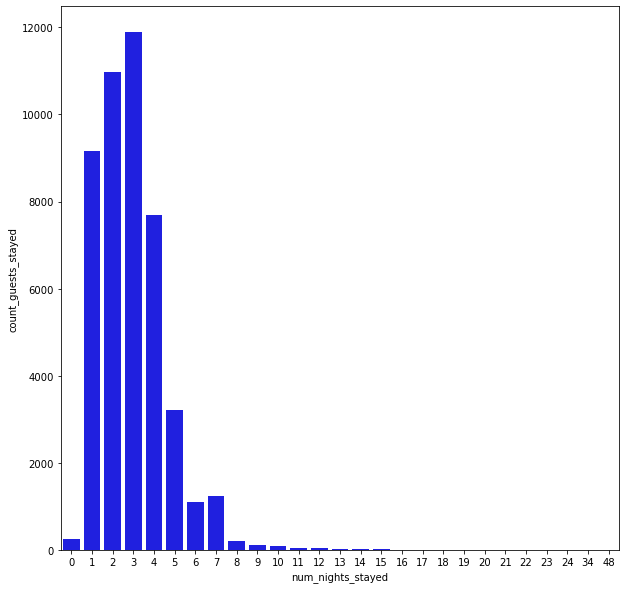

In [43]:
plt.figure(figsize=(10, 10))
sns.barplot(x = "num_nights_stayed", y = "count_guests_stayed",data=ch_num_nights_df, color='blue')
plt.show()

In [44]:
#Customers tend to stay for 1 to 4 nights in both hotels.

#### 6. Cancellation Insights

In [46]:
res_book_per_month = full_df[full_df["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = full_df[full_df["hotel"]=='Resort Hotel'].groupby("arrival_date_month")["is_canceled"].sum()
ch_book_per_month = full_df[full_df["hotel"] == "City Hotel"].groupby("arrival_date_month")["hotel"].count()
ch_cancel_per_month = full_df[full_df["hotel"]=='City Hotel'].groupby("arrival_date_month")["is_canceled"].sum()

In [47]:
res_cancel_df = pd.DataFrame({'Hotel':'Resort Hotel',
              'Month':list(res_book_per_month.index),
              'Booking' :list(res_book_per_month.values),
              'Cancellation':list(res_cancel_per_month.values)})
res_cancel_df

,Hotel,Month,Booking,Cancellation
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [48]:
ch_cancel_df = pd.DataFrame({'Hotel':'City Hotel',
              'Month':list(ch_book_per_month.index),
              'Booking' :list(ch_book_per_month.values),
              'Cancellation':list(ch_cancel_per_month.values)})
ch_cancel_df

,Hotel,Month,Booking,Cancellation
0,City Hotel,April,7469,3459
1,City Hotel,August,8967,3600
2,City Hotel,December,4114,1737
3,City Hotel,February,4950,1899
4,City Hotel,January,3730,1481
5,City Hotel,July,8071,3301
6,City Hotel,June,7885,3527
7,City Hotel,March,6434,2385
8,City Hotel,May,8221,3653
9,City Hotel,November,4336,1660


In [49]:
#merge the data
full_cancel_df = pd.concat([ch_cancel_df,res_cancel_df], ignore_index=True)
full_cancel_df

,Hotel,Month,Booking,Cancellation
0,City Hotel,April,7469,3459
1,City Hotel,August,8967,3600
2,City Hotel,December,4114,1737
3,City Hotel,February,4950,1899
4,City Hotel,January,3730,1481
5,City Hotel,July,8071,3301
6,City Hotel,June,7885,3527
7,City Hotel,March,6434,2385
8,City Hotel,May,8221,3653
9,City Hotel,November,4336,1660


In [53]:
#create a new column
full_cancel_df['Cancel_percent'] = full_cancel_df['Cancellation']/full_cancel_df['Booking']*100


In [54]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_df["Month"] = pd.Categorical(full_cancel_df["Month"], categories=ordered_months, ordered=True)

#### Data Visualisation - Barplot

<AxesSubplot:xlabel='Month', ylabel='cancel_percent'>

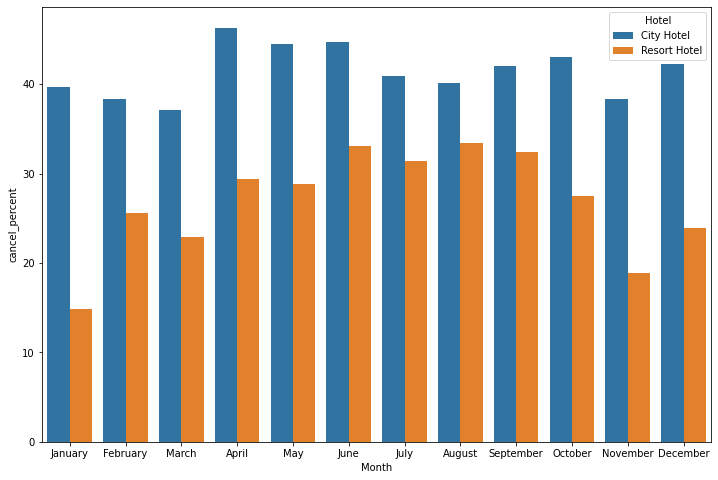

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_df)

In [56]:
#Overall, City Hotel has a higher cancellation rate than Resort Hotel throughout the year, which is around 40%.